# Spin-polarised current driven skyrmion

In [133]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_magnetisation(m):
    m.shape = (-1, 3)
    mx = m[:, 0]
    my = m[:, 1]
    mz = m[:, 2]
    mx.shape = (b, a)
    my.shape = (b, a)
    mz.shape = (b, a)
    
    extent = [0, a, 0, b]
    plt.figure(figsize=(8, 4))
    plt.imshow(mz, extent=extent)
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.title('mz')

In [134]:
from fidimag.micro import Sim
from fidimag.common import CuboidMesh
from fidimag.micro import Zeeman, Demag, DMI, UniformExchange

In [135]:
a = 60  # nm
b = 25  # nm

dx = dy = dz = 2  # nm

mesh = CuboidMesh(nx=a, ny=b, nz=1, dx=dx, dy=dy, dz=dz, unit_length=1e-9, periodicity=(True, False, False))

In [136]:
Ms = 1e6  # magnetisation saturation (A/m)
A = 13e-11  # exchange stiffness (J/m)
D = 4e-2  # DMI constant (J/m**2)
H = (0, 0, 3e6)  # external magnetic field (A/m)
alpha = 1  # Gilbert damping
gamma = 2.211e5  # gyromagnetic ratio (m/As)

In [137]:
sim  = Sim(mesh)  # create simulation object

# Set parameters.
sim.Ms = Ms
sim.alpha = alpha
sim.gamma = gamma

# Add energies.
sim.add(UniformExchange(A=A))
sim.add(DMI(D))
sim.add(Zeeman(H))

	No data defined


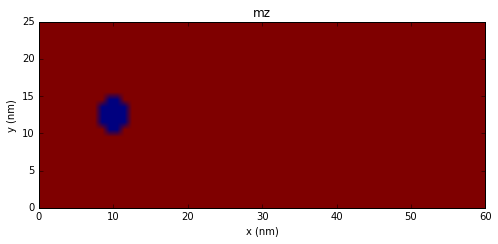

In [138]:
def m_initial(coord):
    # Extract x and y coordinates.
    x = coord[0]
    y = coord[1]
    
    # The centre of the circle
    x_centre = a/3.
    y_centre = b
    
    # Compute the circle radius.
    r = ((x-x_centre)**2 + (y-y_centre)**2)**0.5
    
    if r < 5:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    
sim.set_m(m_initial)
plot_magnetisation(np.copy(sim.spin))

In [139]:
%%capture
sim.relax(dt=1e-13, stopping_dmdt=0.1, max_steps=5000, save_m_steps=None, save_vtk_steps=None)

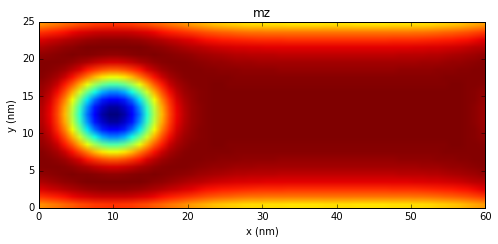

In [140]:
plot_magnetisation(np.copy(sim.spin))

In [153]:
jx = 5e13
beta = 1
sim.jx = jx
sim.beta = beta

sim.reset_integrator()
sim.run_until(25e-9)

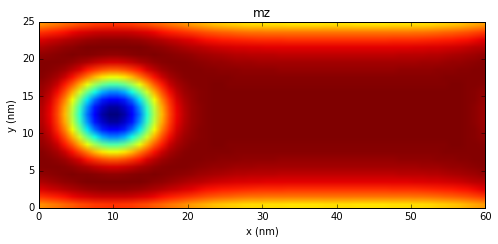

In [154]:
plot_magnetisation(np.copy(sim.spin))